In [ ]:
import os
import sys
from matplotlib import pyplot as plt

module_path = os.path.abspath(os.path.join("..", "src"))
if module_path not in sys.path:
    sys.path.append(module_path)

from analysis.visualization import (
    plot_mae_curves,
    plot_validity_curves,
    plot_time_curves,
    plot_time_histogram_for_step,
    plot_early_exit_starts,
)

plt.rcParams.update(
    {
        "font.size": 14,  # default text size
        "axes.titlesize": 18,  # title
        "axes.labelsize": 16,  # x/y labels
        "xtick.labelsize": 12,  # x ticks
        "ytick.labelsize": 12,  # y ticks
        "legend.fontsize": 12,  # legend
    }
)

In [2]:
import pandas as pd
import numpy as np

times = []
for load in [1.4, 1.6, 1.8, 2.0]:
    df = pd.read_csv(
        f"/home/group-2/graph_gen_app_opt/outputs_simulation/optimized_model_70_steps_FCFS/arrivals_{load}.csv"
    )
    time = df["service_duration"].values.tolist()
    times.extend(time)

service_times = np.array(times)

S_bar = np.mean(service_times)

S2 = np.mean(service_times**2)

mu_mm1 = 1 / S_bar

print(f"Mean service time (S̄): {S_bar:.4f} s")
print(f"Second moment (E[S^2]): {S2:.4f} s^2")
print(f"M/M/1 service rate (μ): {mu_mm1:.4f} jobs/s")

Mean service time (S̄): 1.8147 s
Second moment (E[S^2]): 3.6793 s^2
M/M/1 service rate (μ): 0.5510 jobs/s


In [ ]:
NON_OPT = "../csvs/Non-Optimized_Hyperparameters_mae.csv"
OPT = "../csvs/Optimized_Hyperparameters_mae.csv"
TIME_PER_STEP_OPT = "../csvs/time_no_early_lookup_a.csv"
TIME_PER_STEP_NON_OPT = "../csvs/time_no_early_no_lookup.csv"
TIME_PER_STEP_OPT_EARLY = "../csvs/time_early_lookup.csv"
TIME_PER_STEP_NON_OPT_EARLY = "../csvs/time_early_no_lookup.csv"
EARLY_EXIT = "../csvs/early_exit.csv"
EARLY_EXIT_START = "../csvs/results_early_start_step.csv"
EARLY_EXIT_VALIDITY = "../csvs/early_exit_validities.csv"
TIMING_REPEATED = "../csvs/repeats_70.csv"

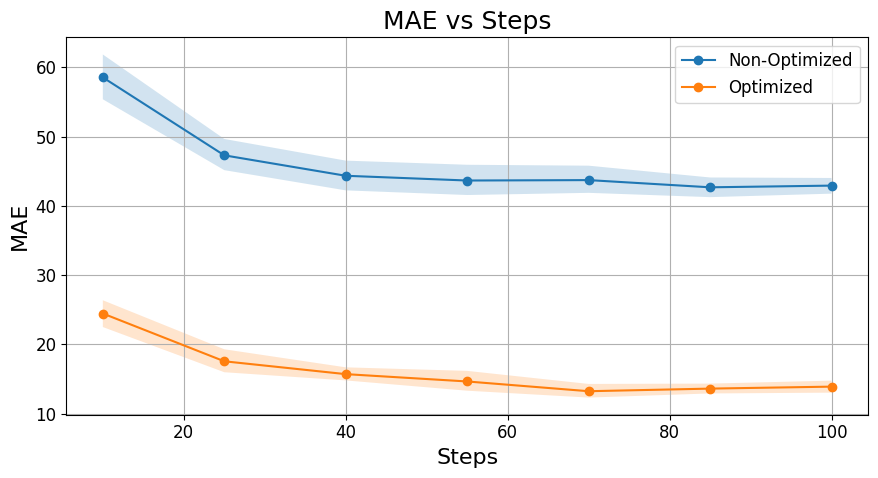

In [ ]:
plot_mae_curves(
    [NON_OPT, OPT, EARLY_EXIT],
    labels=["Non-Optimized", "Optimized", "Early Exit"],
    mae_col="mae_no_exit",
    save_path="../plots/mae_comp.pdf",
)

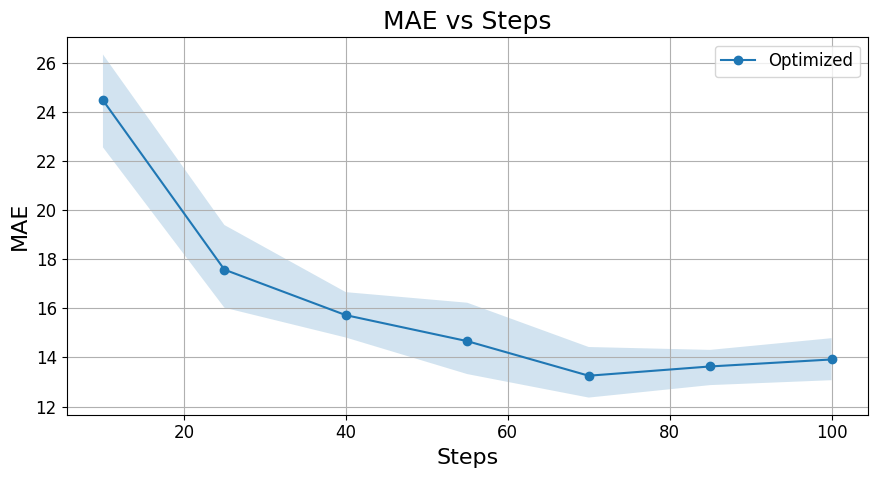

In [5]:
# plot_mae_curves([NON_OPT], labels=["Non-Optimized"], mae_col="mae_no_exit")
plot_mae_curves(
    [OPT], labels=["Optimized"], mae_col="mae_no_exit", save_path="../plots/mae_opt.pdf"
)

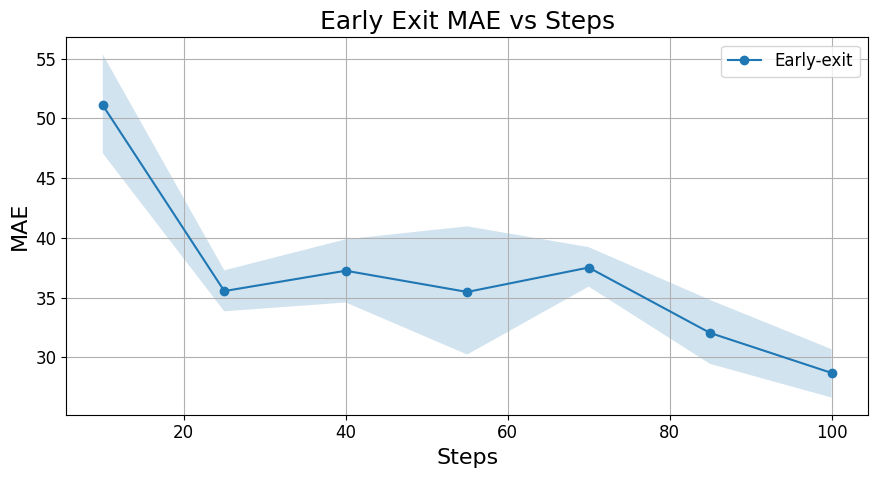

In [6]:
# plot_mae_curves([NON_OPT], labels=["Non-Optimized"], mae_col="mae_no_exit")
plot_mae_curves(
    [EARLY_EXIT],
    labels=["Early-exit"],
    mae_col="mae_early_exit",
    save_path="../plots/early_exit.pdf",
    title="Early Exit MAE vs Steps",
)

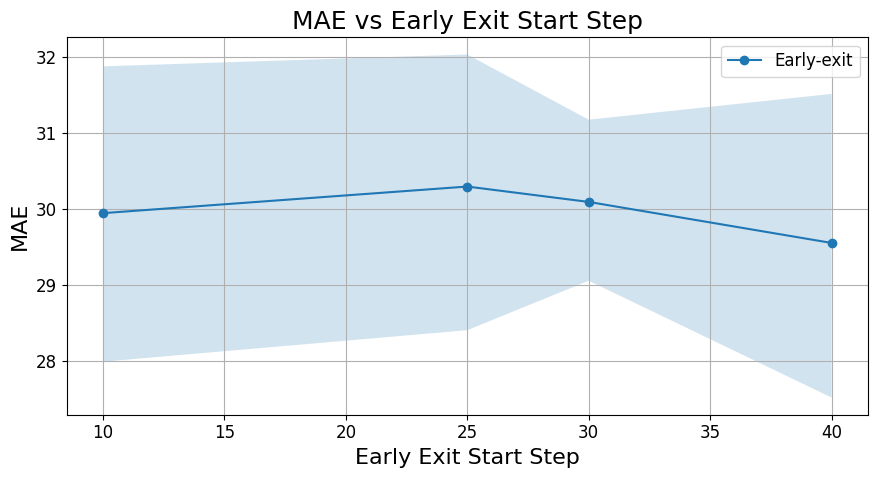

In [7]:
plot_early_exit_starts(
    csv_files=[EARLY_EXIT_START],
    labels=["Early-exit"],
    save_path="../plots/early_exit_start_steps.pdf",
    mae_col="mae_early_exit",
    title="MAE vs Early Exit Start Step",
)

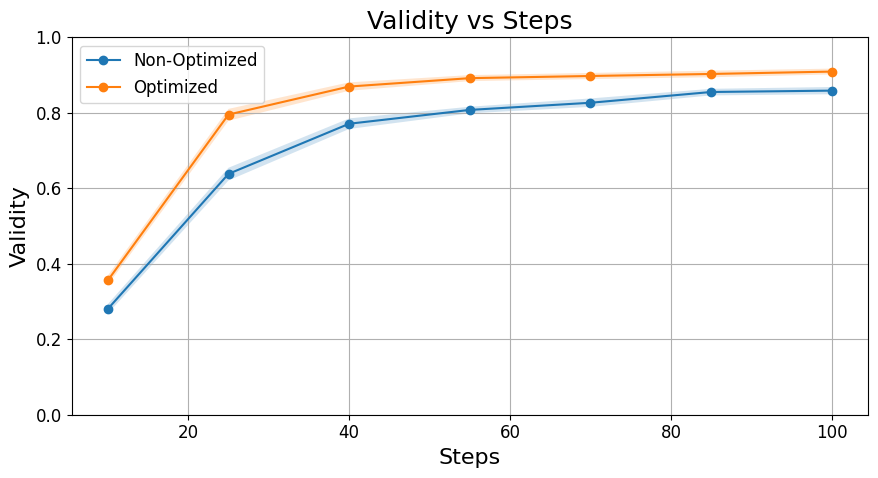

In [ ]:
plot_validity_curves(
    [NON_OPT, OPT, EARLY_EXIT_VALIDITY],
    labels=["Non-Optimized", "Optimized", "Optimized + Early Exit"],
    val_col="validity_no_exit",
    save_path="../plots/validity_comp.pdf",
)

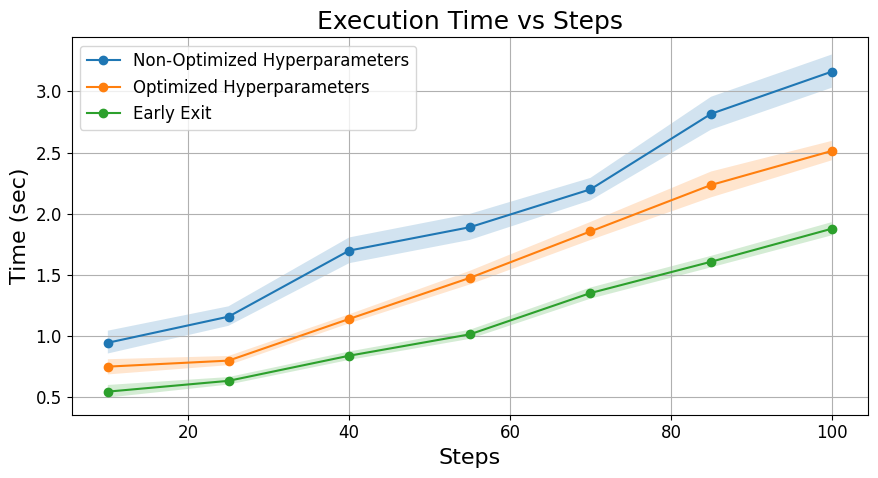

In [9]:
plot_time_curves(
    [TIME_PER_STEP_NON_OPT, TIME_PER_STEP_OPT, TIME_PER_STEP_NON_OPT_EARLY],
    labels=["Non-Optimized Hyperparameters", "Optimized Hyperparameters", "Early Exit"],
    save_path="../plots/time_comp.pdf",
)

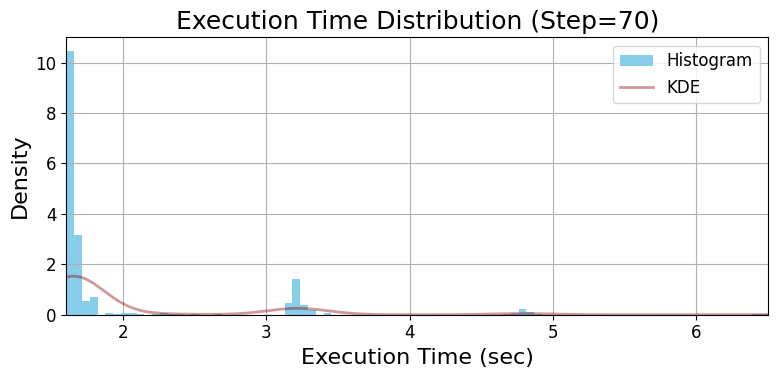

In [11]:
plot_time_histogram_for_step(
    TIMING_REPEATED, step=70, bins=90, save_path="../plots/times.pdf"
)